## Overview

## Business Understanding

## Data Understanding

Import Libraries to use

In [237]:
# Perfom data manipulation and analysis.
import pandas as pd

# Perfoming mathematical calculations.
import numpy as np

# The two libraries below will aid in creating visualizations.
import matplotlib.pyplot as plt 
import seaborn as sns

Load Dataset

In [238]:
df = pd.read_csv('Files/medic.csv')

Display data

In [239]:
df

,age,sex,bmi,children,smoker,region,medical charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [240]:
# create a copy
medic_df = df.copy()

Get to know data information - use the created copy

In [241]:
# basic info about our data
medic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              1338 non-null   int64  
 1   sex              1338 non-null   object 
 2   bmi              1338 non-null   float64
 3   children         1338 non-null   int64  
 4   smoker           1338 non-null   object 
 5   region           1338 non-null   object 
 6   medical charges  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [242]:
# statistical information
medic_df.describe()

,age,bmi,children,medical charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### Outliers

From the statistical iformation above, the dataset appear to contain outliers within medical charges feature.

We can confirm this by statistical methods(z-scores, IQR, standard deviation thresholds) and visualizations(boxplot, scatter plot, histogram) to visually identify outliers.

**statistical methods**

1. Z-Score Method

It measures how many standard deviations a data point is from the mean. Typically, a threshold (e.g., |Z| > 3) is used to identify outliers.

In [243]:
# Calculate Z-scores

mean = medic_df['medical charges'].mean()
std_dev = medic_df['medical charges'].std()

# create a new column(z-scores)
medic_df['z_score'] = (medic_df['medical charges'] - mean) / std_dev

# Identify outliers (e.g., Z-score threshold of 3) 
outliers = medic_df.loc[medic_df['z_score'].abs() > 3, ['medical charges','z_score'] ]

print(outliers)

      medical charges   z_score
34        51194.55914  3.131635
543       63770.42801  4.170104
577       58571.07448  3.740761
819       55135.40209  3.457055
1146      52590.82939  3.246934
1230      60021.39897  3.860523
1300      62592.87309  4.072866


From the results above:
    
I have identified 7 outliers within medical charges

In [244]:
# drop the z_score column
medic_df.drop(columns='z_score', inplace=True)

2. Interquartile Range (IQR) Method

The IQR method calculates outliers as data points below the first quartile (Q1) - 1.5 * IQR or above the third quartile (Q3) + 1.5 * IQR.

In [273]:
# Calculate Q1, Q3, and IQR
Q1 = medic_df['medical charges'].quantile(0.25)
Q3 = medic_df['medical charges'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Identify outliers
outliers = [x for x in medic_df['medical charges'] if  x > upper_bound]

print(len(outliers))
print("Outliers using IQR:", outliers)

139
Outliers using IQR: [39611.7577, 36837.467000000004, 37701.8768, 38711.0, 35585.576, 51194.55914, 39774.2763, 48173.361, 38709.176, 37742.5757, 47496.49445, 37165.1638, 39836.519, 43578.9394, 47291.055, 47055.5321, 39556.4945, 40720.55105, 36950.2567, 36149.4835, 48824.45, 43753.33705, 37133.8982, 34779.615, 38511.6283, 35160.13457, 47305.305, 44260.7499, 41097.16175, 43921.1837, 36219.40545, 46151.1245, 42856.837999999996, 48549.17835, 47896.79135, 42112.2356, 38746.3551, 42124.5153, 34838.873, 35491.64, 42760.5022, 47928.03, 48517.56315, 41919.097, 36085.219, 38126.2465, 42303.69215, 46889.2612, 46599.1084, 39125.33225, 37079.372, 35147.52848, 48885.135610000005, 36197.699, 38245.59327, 48675.5177, 63770.42801, 45863.205, 39983.42595, 45702.02235, 58571.074479999996, 43943.8761, 39241.442, 42969.8527, 40182.246, 34617.84065, 42983.4585, 42560.4304, 40003.33225, 45710.20785, 46200.9851, 46130.5265, 40103.89, 34806.4677, 40273.6455, 44400.4064, 40932.4295, 40419.0191, 36189.1017, 4

3. Standard Deviation Method

This method uses the mean and standard deviation, typically flagging data points that are more than 2 or 3 standard deviations away from the mean as outliers.

In [246]:
# Calculate mean and standard deviation
mean = medic_df['medical charges'].mean()
std_dev = medic_df['medical charges'].std()

# Define outlier bounds (e.g., 3 standard deviations)
lower_bound = mean - 3 * std_dev
upper_bound = mean + 3 * std_dev

# Identify outliers
outliers = [x for x in medic_df['medical charges'] if x < lower_bound or x > upper_bound]
print("Outliers using Standard Deviation:", outliers)

Outliers using Standard Deviation: [51194.55914, 63770.42801, 58571.074479999996, 55135.402089999996, 52590.82939, 60021.39897, 62592.87309]


#### Visualizations

In [247]:
sns.color_palette("tab10")

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

<AxesSubplot:xlabel='medical charges', ylabel='Count'>

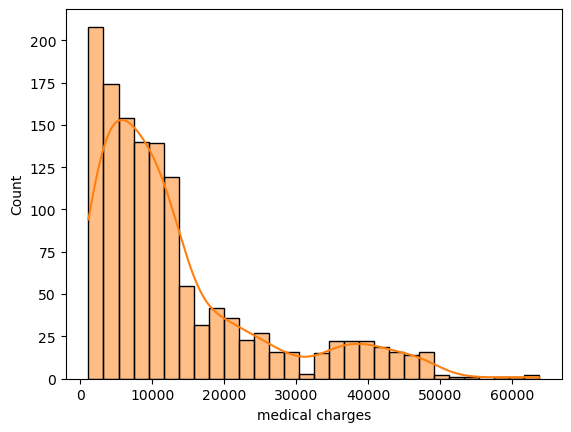

In [248]:
sns.histplot(data=medic_df['medical charges'], kde=True, color=sns.color_palette("tab10")[1])

<AxesSubplot:>

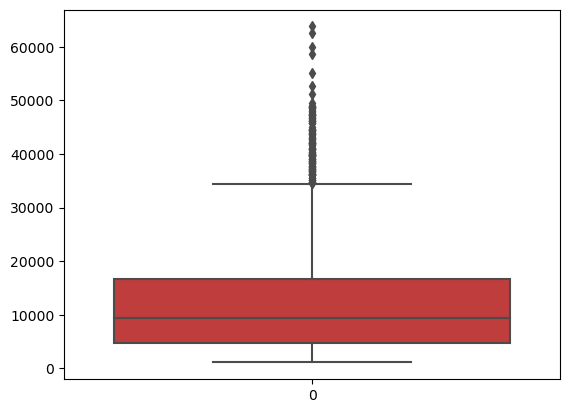

In [249]:
sns.boxplot(data=medic_df['medical charges'], color=sns.color_palette("tab10")[3])

<AxesSubplot:ylabel='medical charges'>

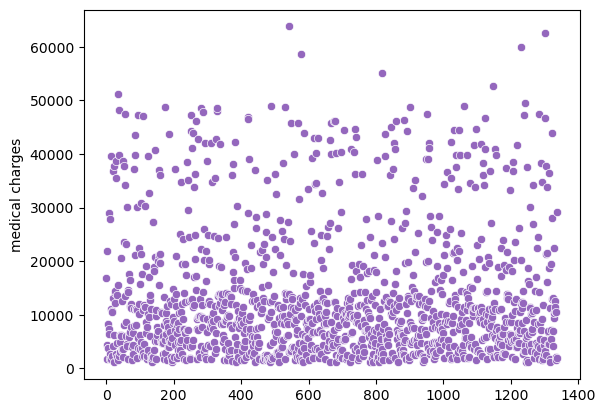

In [250]:
sns.scatterplot(data=medic_df['medical charges'], color=sns.color_palette("tab10")[4])

## Data Preparations

In [251]:
medic_df

,age,sex,bmi,children,smoker,region,medical charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


#### Check for missing values

In [252]:
medic_df.isna().sum()

age                0
sex                0
bmi                0
children           0
smoker             0
region             0
medical charges    0
dtype: int64

Observations above -> My data has 0 missing values

In [253]:
# Filter columns of type object
obj_columns = medic_df.select_dtypes(object).columns.tolist()
obj_columns

['sex', 'smoker', 'region']

In [254]:
def obj_cols(dataframe, columns, task):
    for col in columns:
        print(task(medic_df[col]))
        print("----------------------------")

In [255]:
# unique values
obj_cols(medic_df, obj_columns, pd.Series.unique)

['female' 'male']
----------------------------
['yes' 'no']
----------------------------
['southwest' 'southeast' 'northwest' 'northeast']
----------------------------


In [256]:
# value counts
obj_cols(medic_df, obj_columns, pd.Series.value_counts)

male      676
female    662
Name: sex, dtype: int64
----------------------------
no     1064
yes     274
Name: smoker, dtype: int64
----------------------------
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64
----------------------------


## Data Visualisation

In [277]:
medic_df.head()

,age,sex,bmi,children,smoker,region,medical charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### Seaborn

I prefer using seaborn library because the syntax is easy

In [362]:
medic_df['sex'].count()

1338

[]

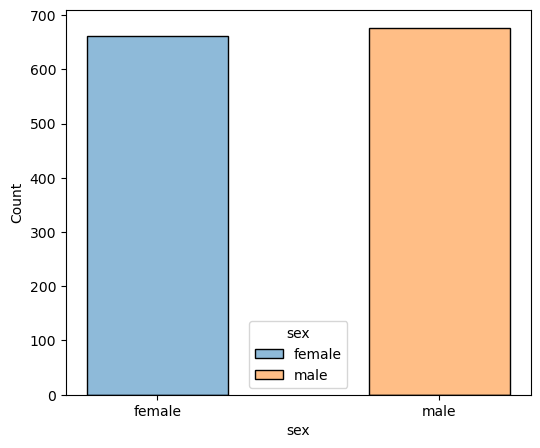

In [375]:
plt.figure(figsize=(6,5))
sns.histplot(data=medic_df, x='sex', hue='sex', shrink=.5)
plt.plot()

[]

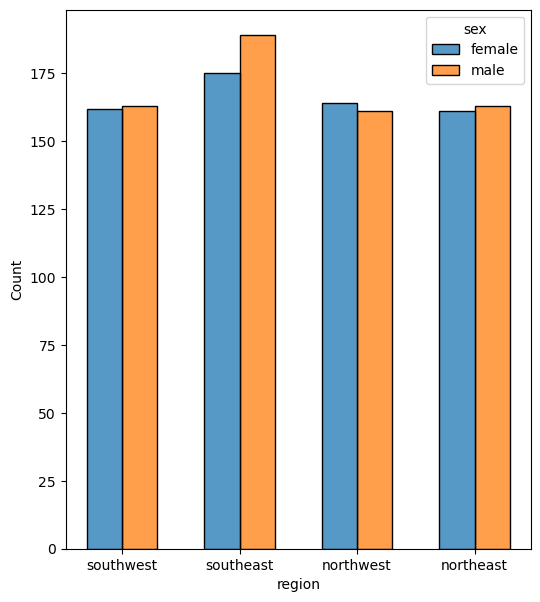

In [383]:
# region and gender
plt.figure(figsize=(6,7))
sns.histplot(data=medic_df, x='region', hue='sex', shrink=.6, multiple='dodge')
plt.plot()

[]

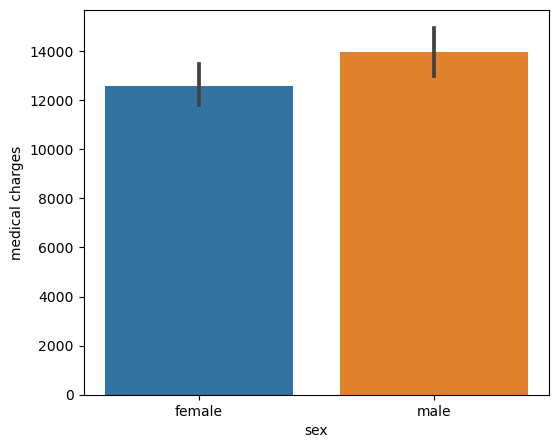

In [395]:
# berplot to indicate each gender with their total medical charges
plt.figure(figsize=(6,5))
sns.barplot(x=medic_df['sex'], y=medic_df['medical charges'])
plt.plot()

[]

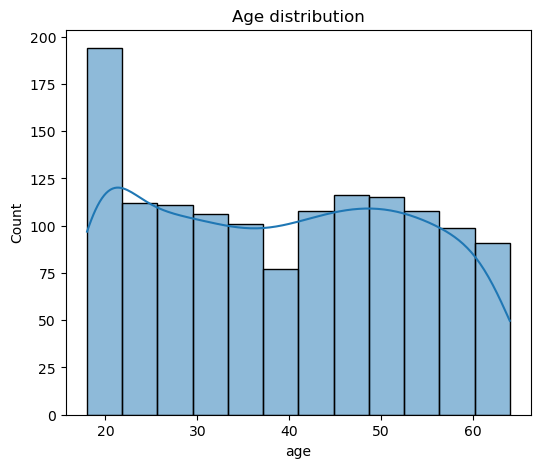

In [408]:
# age distribution
fig, ax = plt.subplots(figsize=(6,5))

sns.histplot(data=medic_df['age'], kde=True)
ax.set_title("Age distribution")

plt.plot()